# Corpus Analysis for Reddit Trading Platform Sentiment Data

This notebook analyzes the corpus obtained from Reddit to determine:
1. Number of records (comments)
2. Total number of words
3. Number of unique words (types)
4. Most frequent words

In [2]:
import pandas as pd
import re
from collections import Counter
import os
import nltk
from nltk.corpus import stopwords

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

In [3]:
corpus_file = "results.csv" 


if not os.path.exists(corpus_file):
    print(f"Error: File not found: {corpus_file}")
else:
    print(f"Found corpus file: {corpus_file}")

Found corpus file: results.csv


In [4]:
df = pd.read_csv(corpus_file)
df.head()

,subreddit,title,post_id,post_url,post_content,comment_id,comment_body,comment_author,comment_score,created,created_iso,readable_date,sentiment
0,tigerbrokers_official,TigerGPT Upgrades with DeepSeek-R1 and looks s...,1isb5q5,https://www.reddit.com/gallery/1isb5q5,[No text content],mdz914f,"yeah, i saw the launch news [from Reuters, Tig...",Passionjason,1,1.740142e+09,2025-02-21T12:41:42,21 February 2025,0.9201
1,webull,Official referral thread,yvxdse,https://www.reddit.com/r/Webull/comments/yvxds...,Get your referral code or share one for someon...,lfv8ptv,Do you like money? That’s so weird so do I! We...,SirDouchebagTheThird,1,1.722457e+09,2024-07-31T20:09:53,31 July 2024,0.7815
2,webull,Official referral thread,yvxdse,https://www.reddit.com/r/Webull/comments/yvxds...,Get your referral code or share one for someon...,kuld53j,"If anyone is still looking for a webull offer,...",Solid_Subject,1,1.710284e+09,2024-03-12T22:49:00,12 March 2024,0.7269
3,webull,Official referral thread,yvxdse,https://www.reddit.com/r/Webull/comments/yvxds...,Get your referral code or share one for someon...,kt15bq7,Not only can you get 75 free fractional shares...,taegha,1,1.709403e+09,2024-03-02T18:06:13,02 March 2024,0.9933
4,webull,Official referral thread,yvxdse,https://www.reddit.com/r/Webull/comments/yvxds...,Get your referral code or share one for someon...,mksi2wj,Unlock the stock market’s hidden treasure 👋👋👋 ...,nuddermado,1,1.743473e+09,2025-04-01T02:04:07,01 April 2025,0.9601


In [5]:
num_records = len(df)
print(f"Total records: {num_records}")

Total records: 11195


Distribution of comments across subreddits:
subreddit
tdameritrade             2087
Fidelity                 1457
thinkorswim              1000
FreetradeApp              920
Wealthsimple              742
Etoro                     659
InteractiveBrokers        657
merrilledge               615
Trading212                606
webull                    526
CharlesSchwab             444
singaporefi               407
RobinHood                 317
moomoo_official           302
ibkr                      262
plus500                    69
etrade                     54
TradeStation               35
vanguard                   21
RevolutTrading              9
TigerBrokers                5
tigerbrokers_official       1
Name: count, dtype: int64


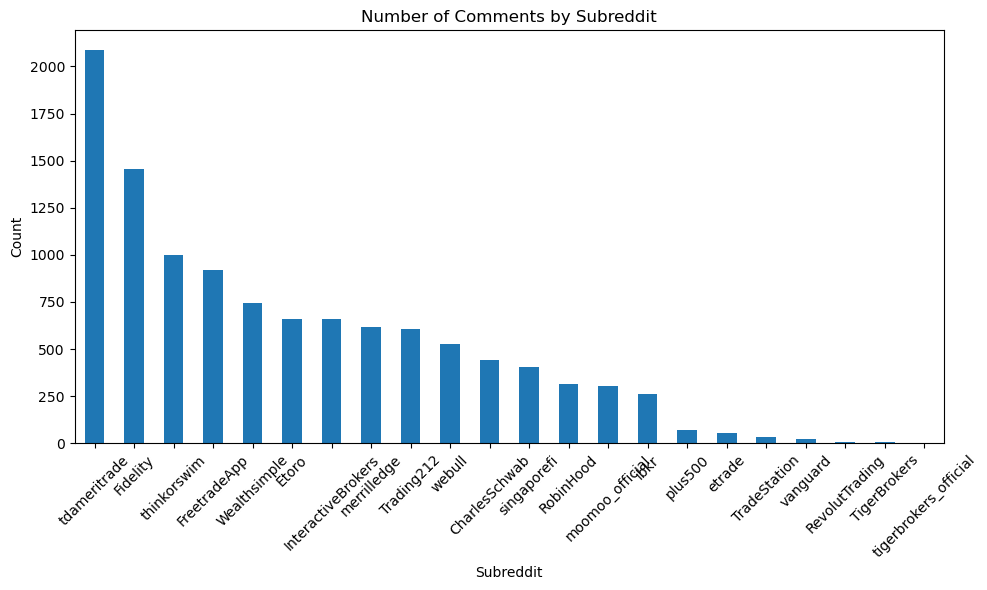

In [6]:
if 'subreddit' in df.columns:
    subreddit_counts = df['subreddit'].value_counts()
    print("Distribution of comments across subreddits:")
    print(subreddit_counts)
    
    # Visualize the distribution
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    subreddit_counts.plot(kind='bar')
    plt.title('Number of Comments by Subreddit')
    plt.xlabel('Subreddit')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [7]:
all_text = " ".join(df['comment_body'].astype(str).tolist())
# Clean the text (remove punctuation, lowercase everything)
clean_text = re.sub(r'[^\w\s]', ' ', all_text.lower())

# Split into words
words = clean_text.split()
num_words = len(words)
print(f"Total words: {num_words}")

Total words: 1137778


In [8]:
# Count unique words
unique_words = set(words)
num_unique_words = len(unique_words)
print(f"Total unique words: {num_unique_words}")

# Count unique words excluding stopwords
stop_words = set(stopwords.words('english'))
meaningful_unique_words = unique_words - stop_words
num_meaningful_unique = len(meaningful_unique_words)
print(f"Unique words (excluding stopwords): {num_meaningful_unique}")

Total unique words: 33147
Unique words (excluding stopwords): 32998


In [9]:
# Get most common words
word_counts = Counter(words)
most_common = word_counts.most_common(20)
print("Most common 20 words:")
for word, count in most_common:
    print(f"  {word}: {count}")

Most common 20 words:
  the: 34757
  to: 29237
  i: 24387
  and: 21699
  a: 21181
  you: 18537
  it: 15040
  is: 13756
  of: 12731
  for: 11994
  in: 11348
  that: 11027
  previous: 9118
  s: 8638
  on: 7901
  have: 7712
  t: 7572
  with: 7237
  they: 7221
  if: 6893


In [10]:
# Get most common words with more comprehensive filtering
filtered_words = [word for word in words 
                 if word not in stop_words 
                 and not word.isdigit()  # Remove pure numbers
                 and not bool(re.match(r'^\d+[a-z]*$', word))  # Remove number-word combinations like "2nd"
                 and len(word) > 1  # Remove single characters
                 and word not in ['https', 'http', 'com', 'www']]  # Remove common URL components

filtered_word_counts = Counter(filtered_words)
most_common_filtered = filtered_word_counts.most_common(20)
print("Most common 20 words (excluding stopwords, numbers, and irrelevant tokens):")
for word, count in most_common_filtered:
    print(f"  {word}: {count}")

Most common 20 words (excluding stopwords, numbers, and irrelevant tokens):
  previous: 9118
  like: 4578
  account: 4466
  fidelity: 3178
  schwab: 3117
  money: 2854
  would: 2702
  get: 2645
  consensus: 2643
  use: 2226
  one: 2198
  good: 2195
  trading: 2177
  time: 2030
  also: 1975
  market: 1919
  trade: 1795
  cash: 1750
  app: 1740
  tos: 1675


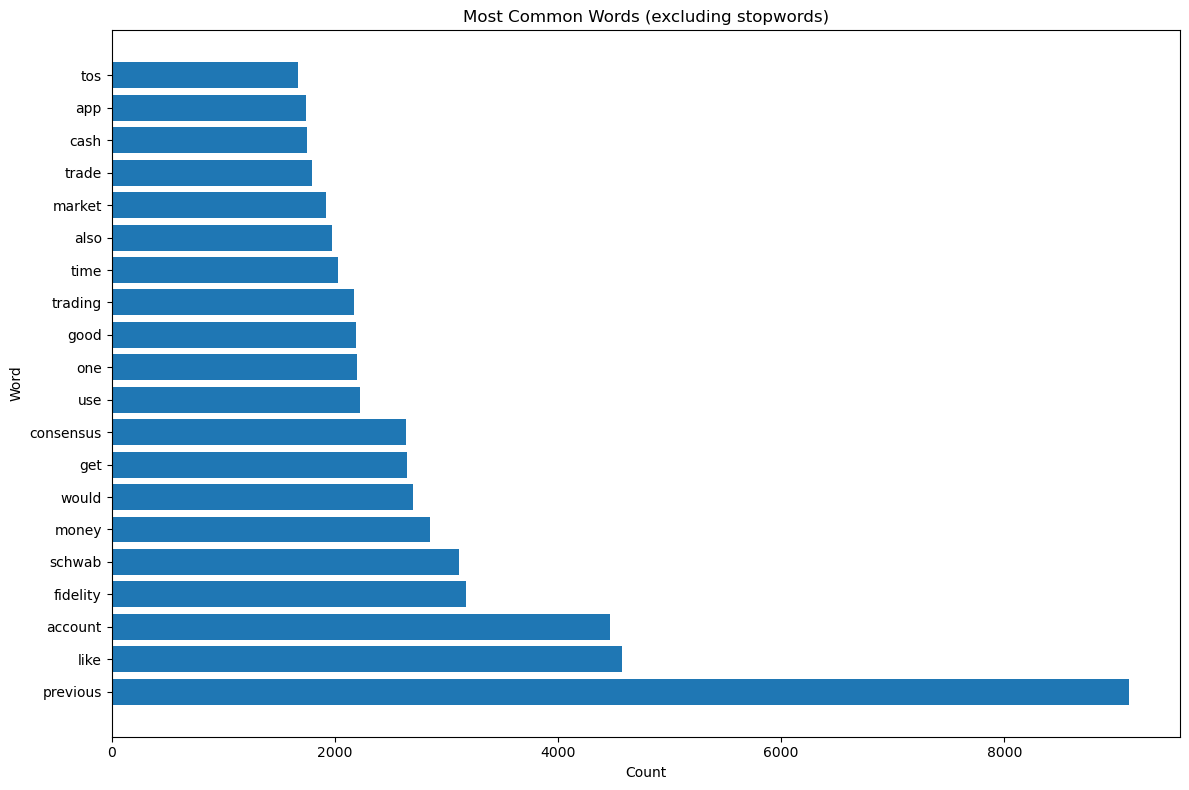

In [11]:
# Visualize the most common words
import matplotlib.pyplot as plt

# Plot for most common meaningful words
plt.figure(figsize=(12, 8))
words_df = pd.DataFrame(most_common_filtered, columns=['word', 'count'])
plt.barh(words_df['word'], words_df['count'])
plt.title('Most Common Words (excluding stopwords)')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

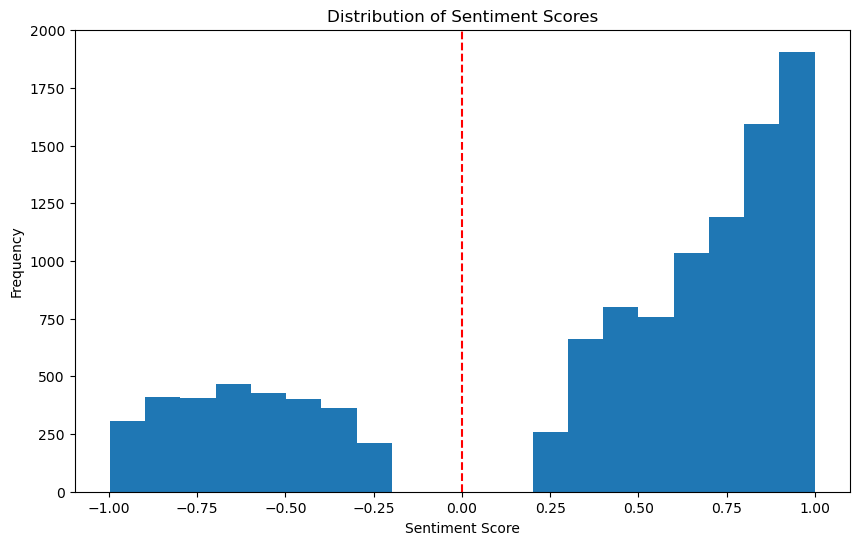

Positive comments: 8203 (73.27%)
Negative comments: 2992 (26.73%)
Neutral comments: 0 (0.00%)


In [12]:
# Optional: Sentiment distribution if you have sentiment data
if 'sentiment' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['sentiment'], bins=20)
    plt.title('Distribution of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.show()
    
    # Count positive vs negative comments
    positive = (df['sentiment'] > 0).sum()
    negative = (df['sentiment'] < 0).sum()
    neutral = (df['sentiment'] == 0).sum()
    
    print(f"Positive comments: {positive} ({(positive/len(df)*100):.2f}%)")
    print(f"Negative comments: {negative} ({(negative/len(df)*100):.2f}%)")
    print(f"Neutral comments: {neutral} ({(neutral/len(df)*100):.2f}%)")

In [13]:
# Summary of findings
print("\nSummary of Corpus Analysis:")
print(f"Records: {num_records}")
print(f"Total words: {num_words}")
print(f"Unique words: {num_unique_words}")
print(f"Unique words (excluding stopwords): {num_meaningful_unique}")
print(f"Word-to-Type Ratio: {num_words/num_unique_words:.2f}")


Summary of Corpus Analysis:
Records: 11195
Total words: 1137778
Unique words: 33147
Unique words (excluding stopwords): 32998
Word-to-Type Ratio: 34.33


In [15]:
# Add topic modeling with LDA to identify key themes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['comment_body'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
n_top_words = 10

print("Top topics and their keywords:")
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx+1}: {', '.join(top_words)}")

Top topics and their keywords:
Topic #1: like, money, account, just, cash, market, don, trading, fidelity, buy
Topic #2: previous, consensus, net, speculative, positions, cftc, index, events, fed, oil
Topic #3: schwab, tos, app, like, use, td, tda, just, trading, platform
Topic #4: account, fidelity, com, https, www, bank, transfer, support, customer, accounts
Topic #5: tax, just, like, good, years, year, money, don, time, etoro
